In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


# Redes secuenciales

## Mnist

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\Jafet\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Escalar los valores de píxeles a [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
# Entrenamos el modelo
history = model.fit(x_train, y_train, epochs=10)

# Evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.9974 - loss: 0.0071
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.9974 - loss: 0.0078
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9971 - loss: 0.0098
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.9980 - loss: 0.0057
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9973 - loss: 0.0085
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.9973 - loss: 0.0087
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.9979 - loss: 0.0054
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.9976 - loss: 0.0080
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9984 - loss: 0.0057
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.9980 - loss: 0.0074
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9751 - loss: 0.1622
Test accuracy: 0.97979

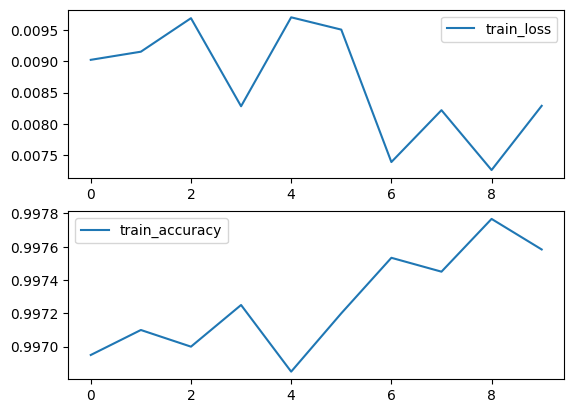

In [9]:
# Graficamos la perdida y el accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.show()


## Cifar 10

In [8]:
# Crear el modelo secuencial
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Tercera capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    # Aplanar y conectar a la red densa
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 clases para CIFAR-10
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

C:\Users\Jafet\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Cargar los datos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Escalar valores de píxeles a [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2188 - loss: 2.0375 - val_accuracy: 0.4552 - val_loss: 1.5066
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4322 - loss: 1.5373 - val_accuracy: 0.5051 - val_loss: 1.3503
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4959 - loss: 1.3868 - val_accuracy: 0.5668 - val_loss: 1.2329
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5345 - loss: 1.3010 - val_accuracy: 0.6185 - val_loss: 1.0979
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5661 - loss: 1.2121 - val_accuracy: 0.6083 - val_loss: 1.0915
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5911 - loss: 1.1567 - val_accuracy: 0.6462 - val_loss: 1.0218
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5981 - loss: 1.1398 - val_accuracy: 0.6729 - val_loss: 0.9512
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6136 - loss: 1.0948 - val_accuracy: 0.

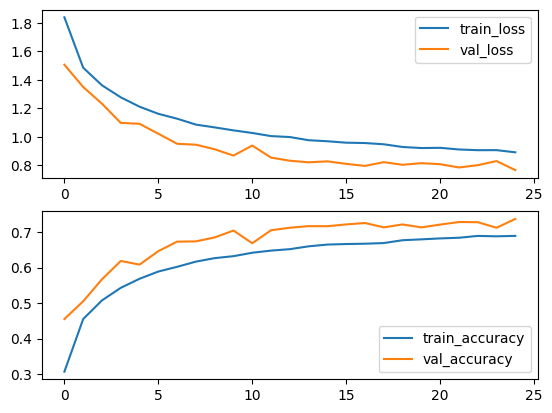

In [11]:
# Graficamos la perdida y el accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Redes convolucionales

## CIFAR 10

No hace falta probar en mnist, ya hemos alcanzado un valor de precisión muy alto

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Crear el modelo secuencial
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Tercera capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Aplanar y conectar a la red densa
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 clases para CIFAR-10
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


C:\Users\Jafet\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Cargar los datos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Escalar valores de píxeles a [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7196 - loss: 0.8058 - val_accuracy: 0.7328 - val_loss: 0.7669
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7272 - loss: 0.7971 - val_accuracy: 0.7615 - val_loss: 0.6978
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7211 - loss: 0.8122 - val_accuracy: 0.7302 - val_loss: 0.7867
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7319 - loss: 0.7765 - val_accuracy: 0.6360 - val_loss: 1.0931
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7252 - loss: 0.7935 - val_accuracy: 0.7453 - val_loss: 0.7509
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7266 - loss: 0.7887 - val_accuracy: 0.7605 - val_loss: 0.7001
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7338 - loss: 0.7769 - val_accuracy: 0.7644 - val_loss: 0.6847
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7290 - loss: 0.7834 - val_accuracy

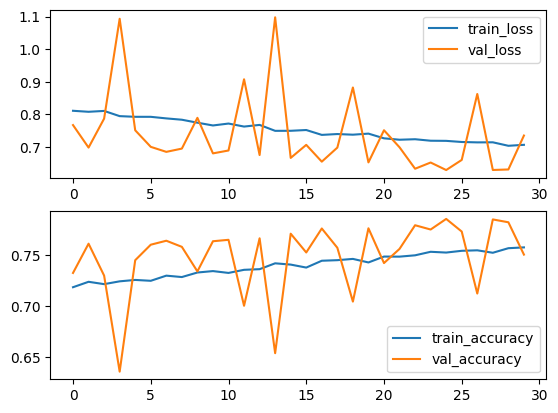

In [15]:
# Graficamos la perdida y el accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()